<a href="https://colab.research.google.com/github/Lalitha1704/EdgeAI-Traffic-Signal/blob/main/EdgeAI_Traffic_Signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics opencv-python-headless numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2, numpy as np, time, matplotlib.pyplot as plt
from IPython.display import clear_output

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load YOLOv5n model (downloads automatically)
model = YOLO("yolov5n.pt")

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
from google.colab import files
uploaded = files.upload()

# Use the filename you uploaded, e.g. 'traffic.mp4'
video_path = list(uploaded.keys())[0]

Saving traffic.mp4 to traffic.mp4


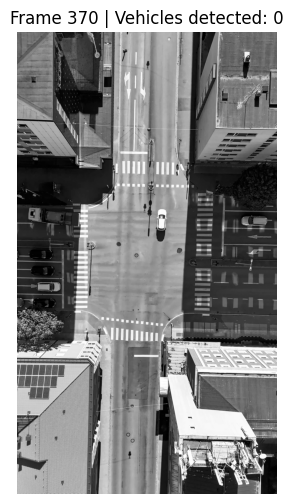


0: 640x384 (no detections), 11.8ms
Speed: 5.2ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 9.9ms
Speed: 3.4ms preprocess, 9.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 6.9ms
Speed: 3.1ms preprocess, 6.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 6.4ms
Speed: 3.5ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 7.5ms
Speed: 2.9ms preprocess, 7.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
cap = cv2.VideoCapture(video_path)
frame_count = 0
counts_list = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    results = model(frame, stream=True)
    car_count = 0

    for r in results:
        for box in r.boxes:
            cls = int(box.cls[0])
            if model.names[cls] in ['car','bus','truck','motorbike']:
                car_count += 1
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2)

    counts_list.append(car_count)

    # show every 10th frame
    if frame_count % 10 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(10,6))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"Frame {frame_count} | Vehicles detected: {car_count}")
        plt.show()

cap.release()


In [ ]:
import random

lanes = ["North", "East", "South", "West"]
lane_vehicle_count = {lane: random.randint(0,20) for lane in lanes}

def compute_green_time(vehicle_count):
    base = 10        # base green seconds
    extra = vehicle_count // 2
    return min(base + extra, 60)

for lane in lanes:
    green_time = compute_green_time(lane_vehicle_count[lane])
    print(f"{lane}: {lane_vehicle_count[lane]} vehicles → Green {green_time}s")


North: 5 vehicles → Green 12s
East: 8 vehicles → Green 14s
South: 7 vehicles → Green 13s
West: 9 vehicles → Green 14s


In [ ]:
def get_lane_counts(frame, results):
    h, w, _ = frame.shape
    mid_x = w // 2
    left, right = 0, 0
    for r in results:
        for box in r.boxes:
            cls = int(box.cls[0])
            if model.names[cls] in ['car','bus','truck','motorbike']:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                center_x = (x1 + x2)//2
                if center_x < mid_x: left += 1
                else: right += 1
    return left, right

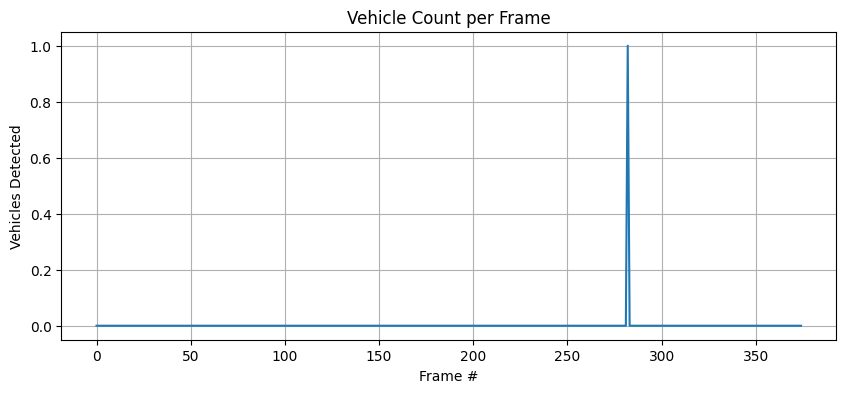

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(counts_list)
plt.title("Vehicle Count per Frame")
plt.xlabel("Frame #")
plt.ylabel("Vehicles Detected")
plt.grid(True)
plt.show()